# Problem 1: K means clustering


#### Perform k means clustering on the [r,g,b] pixel data of the image 'chilis.jpg' for k = 3 clusters. Terminate the algorithm when the cluster means do not change in an iteration. 

You can initialize the cluster centers as:
*   $c_1=[255, 0, 0]$
*   $c_2=[0,0,0]$
*   $c_3=[255,255,255]$

In order to visualise the output, replace all pixels corresponding to a cluster with it's mean value. Display this image along with the cluster means.

Code the algorithm from scratch without using libraries like scikit-learn.  




In [ ]:
from google.colab import files
uploaded = files.upload()

Saving chilis.jpg to chilis.jpg


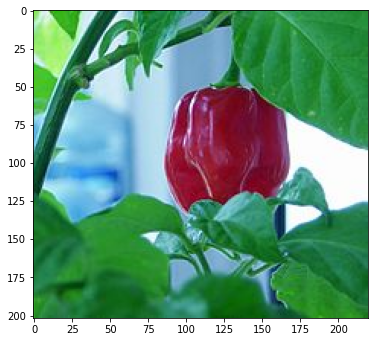

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))
class KMeans():
    def __init__(self, K=3, max_iters=100, plot_steps=False):
        self.K = K
        self.max_iters = max_iters
        self.plot_steps = plot_steps
        # list of sample indices for each cluster
        self.clusters = [[] for _ in range(self.K)]
        # the centers (mean feature vector) for each cluster
        self.centroids = []
    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape
        
        # initialize 
        #random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
        self.centroids = ([[255,0,0], [0,0,0],[255,255,255]])
        # Optimize clusters
        for _ in range(self.max_iters):
            # Assign samples to closest centroids (create clusters)
            self.clusters = self._create_clusters(self.centroids)
            if self.plot_steps:
                self.plot()
            # Calculate new centroids from the clusters
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)
            
            # check if clusters have changed
            if self._is_converged(centroids_old, self.centroids):
                break
            if self.plot_steps:
                self.plot()
        # Classify samples as the index of their clusters
        return self._get_cluster_labels(self.clusters)
    def _get_cluster_labels(self, clusters):
        # each sample will get the label of the cluster it was assigned to
        labels = np.empty(self.n_samples)
        for cluster_idx, cluster in enumerate(clusters):
            for sample_index in cluster:
                labels[sample_index] = cluster_idx
        return labels
    def _create_clusters(self, centroids):
        # Assign the samples to the closest centroids to create clusters
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters
    def _closest_centroid(self, sample, centroids):
        # distance of the current sample to each centroid
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_index = np.argmin(distances)
        return closest_index
    def _get_centroids(self, clusters):
        # assign mean value of clusters to centroids
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids
    def _is_converged(self, centroids_old, centroids):
        # distances between each old and new centroids, fol all centroids
        distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)]
        return sum(distances) == 0
    def plot(self):
        fig, ax = plt.subplots(figsize=(12, 8))
        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)
        for point in self.centroids:
            ax.scatter(*point, marker="x", color='black', linewidth=2)
        plt.show()
    def cent(self):
        return self.centroids
import cv2
from google.colab.patches import cv2_imshow
image = cv2.imread("chilis.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(6, 6)) 
plt.imshow(image)

In [ ]:
pixel_values = image.reshape((-1, 3))
pixel_values = np.float32(pixel_values)
print(pixel_values.shape)

(44440, 3)


In [ ]:
k = KMeans(K=3, max_iters=100)  
y_pred = k.predict(pixel_values) 
k.cent()

array([[127.49104309,  27.98249054,  59.64902496],
       [ 37.68238831, 127.91288757,  63.82744598],
       [158.30232239, 205.66906738, 218.11158752]])

In [ ]:
centers = np.uint8(k.cent())
centers

array([[127,  27,  59],
       [ 37, 127,  63],
       [158, 205, 218]], dtype=uint8)

In [ ]:
y_pred

array([1., 2., 2., ..., 1., 1., 1.])

In [ ]:
y_pred = y_pred.astype(int)
np.unique(y_pred)

array([0, 1, 2])

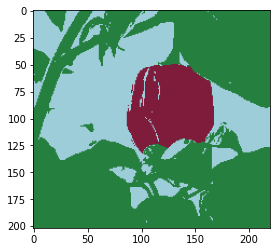

In [ ]:
labels = y_pred.flatten()
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(image.shape)
plt.imshow(segmented_image)
plt.show()

#Problem 2: S.V.M

The Support Vector Machine(S.V.M) algorithm is to find the hyperplane in the N-dimensional space (N-Number of features) that distinctly classifies the data points.

To separate the two classes of data points, there are many possible hyperplanes that could be chosen. The objective is to find a plane that has the maximum margin, i.e the maximum distance between data points of both classes. Maximizing the margin distance provides some reinforcement so that future data points can be classified with more confidence.

##Problem 2, Part A: Linear S.V.M


Use dataset A (``data_prob2_parta.csv``)  for this part of the question. The given CSV file has three columns: column 1 is the first input feature, column 2 is the second input feature and column 3 is the output label. Split the dataset into the training data (75%) and testing data(25%) randomly.




In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data_prob2_parta.csv to data_prob2_parta.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df = pd.read_csv('data_prob2_parta.csv')
x=df[['Input Feature 1','Input Feature 2']]
y=df['Output']

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25,random_state=0)

Visualize the training data with a scatter plot (input feature 1 on the X axis, input feature 2 on the Y axis and color the points according to their labels)

Text(0, 0.5, 'Input Feature 2')

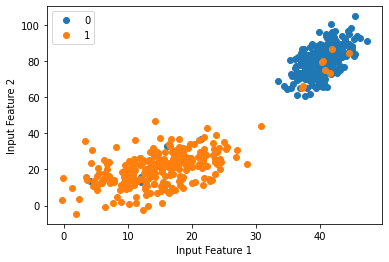

In [ ]:
sc2=pd.DataFrame(x_test['Input Feature 1'])
sc2['Input Feature 2']=x_test['Input Feature 2']
sc2['Output']=y_test
groups=sc2.groupby('Output')
for name, group in groups:
    plt.plot(group["Input Feature 1"], group["Input Feature 2"], marker="o", linestyle="", label=name)
plt.legend()


plt.xlabel('Input Feature 1')
plt.ylabel('Input Feature 2')

Build the Support Vector Machine  model using the 
training data. The scikit
library can be used to build the model.

In [ ]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

Print the parameter and support vectors.


In [ ]:
 # get support vectors
 clf.support_vectors_
 

array([[37.13564241, 61.52524901],
       [36.61707429, 63.09316071],
       [36.73287633, 66.35303823],
       [11.48920131, 13.05380759],
       [11.88899071, 16.54086195],
       [17.06792828, 15.55166994],
       [19.32011275, 18.86456591],
       [39.03102833, 63.35833389],
       [12.14039488, 17.53280255],
       [17.31131006, 29.10314102],
       [39.30646517, 62.17909087],
       [11.57980684, 13.45010625],
       [38.55264801, 64.55484457],
       [36.34335089, 67.33696611],
       [39.51008363, 55.68330331],
       [14.35036782, 24.91863591],
       [10.527969  , 12.68193014],
       [37.8515151 , 59.05696799],
       [21.94812082, 31.7188856 ],
       [32.4960375 , 52.01849385],
       [34.81768234, 69.16210092],
       [13.71882987, 23.53731101],
       [33.70943045, 62.42362159],
       [35.8372741 , 60.97872753],
       [35.95122378, 65.43363213],
       [36.34617903, 67.19467151],
       [36.06539054, 67.13454162],
       [14.6389332 , 12.97488091],
       [37.36891273,

Print the final accuracy on the test data.


In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9733333333333334


Plot the scatter plot for the test data. On top of this scatter plot, plot the separating hyperplane and parallels to the hyperplane that pass through the support vectors.





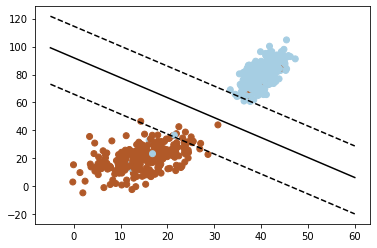

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn import svm
import pylab as pl

# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 60)
yy = a * xx - (clf.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the
# support vectors
b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

# plot the line, the points, and the nearest vectors to the plane
pl.set_cmap(pl.cm.Paired)
pl.plot(xx, yy, 'k-')
pl.plot(xx, yy_down, 'k--')
pl.plot(xx, yy_up, 'k--')

pl.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
           s=80, facecolors='none')
pl.scatter(sc2['Input Feature 1'], sc2['Input Feature 2'], c=sc2['Output'])

pl.axis('tight')
pl.show()

##Problem 2, Part B: Non-linear S.V.M

 Use Dataset B (``data_prob2_partb.csv``) for this part of the question. The given CSV file has three columns: column 1 is the first input feature, column 2 is the second input feature and column 3 is the output label. Split the dataset into training data (75%) and testing data (25%) randomly.


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data_prob2_partb.csv to data_prob2_partb.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df = pd.read_csv('data_prob2_partb.csv')
x=df[['Input Feature 1','Input Feature 2']]
y=df['Output']

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25,random_state=0)

Visualize the training data with a scatter plot (input feature 1 on the X axis, input feature 2 on the Y axis and color the points according to their labels).


Text(0, 0.5, 'Input Feature 2')

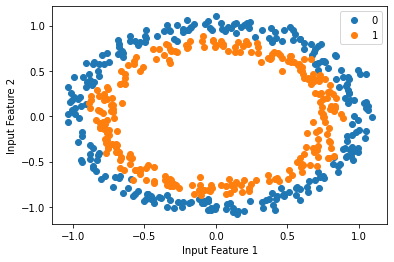

In [ ]:
sc2=pd.DataFrame(x_test['Input Feature 1'])
sc2['Input Feature 2']=x_test['Input Feature 2']
sc2['Output']=y_test
groups=sc2.groupby('Output')
for name, group in groups:
    plt.plot(group["Input Feature 1"], group["Input Feature 2"], marker="o", linestyle="", label=name)
plt.legend()


plt.xlabel('Input Feature 1')
plt.ylabel('Input Feature 2')



Write the code for
choosing best hyperparameters for each of the kernel type.
In text cell after that report the following numbers:
Report the best kernel parameters, regularisation parametes, accuracy for ***linear***, ***RBF*** and ***poly*** kernels(Linear kernels has no kernel parameter).

Note: The scikit library can be used in this case.

In [ ]:
#Import svm model
from sklearn import svm
from sklearn import metrics

#Create a LINEAR svm Classifier
r=1;
bestC_linear=0
bestC_rbf=0
bestC_poly=0
R=[0.2 ,0.4, 0.6, 0.8 ,1]
Degree=[]

bestGamma_rbf=[]
acc_predL=[]
acc_predRBF=[]
acc_predPoly=[]
A1=0
A2=0
A3=0

for i in range(len(R)):
  clfL = svm.SVC(kernel='linear', C=R[i]) # Linear Kernel
  clfRBF = svm.SVC(kernel='rbf', gamma=1,C=R[i]) # RBF Kernel
  clfPoly= svm.SVC(kernel='poly', degree=2, C=R[i]) # Poly Kernel
#Train the model using the training sets
  clfL.fit(x_train, y_train)
  clfRBF.fit(x_train, y_train)
  clfPoly.fit(x_train, y_train)

 #Predict the response for test dataset
  y_predL=clfL.predict(x_test)
  y_predRBF=clfRBF.predict(x_test)
  y_predPoly=clfPoly.predict(x_test)
  
  acc_predL.insert(i,metrics.accuracy_score(y_test, y_predL))
  acc_predRBF.insert(i,metrics.accuracy_score(y_test, y_predRBF))
  acc_predPoly.insert(i,metrics.accuracy_score(y_test, y_predPoly))

  if i>0:
    if acc_predL[i]>=acc_predL[i-1]:
      bestC_linear=R[i]
      A1=acc_predL[i]
  if i>0:
    if acc_predRBF[i]>=acc_predRBF[i-1]:
      bestC_rbf=R[i]
      A2=acc_predRBF[i] 
  if i>0:
    if acc_predPoly[i]>=acc_predPoly[i-1]:
      bestC_poly=R[i]
      A3=acc_predPoly[i]





In [ ]:
#CHECKING FOR BEST DEGREE
bestdegree_poly=0
Degrees=[2,3,4,5,6]
acc_predpolyD=[]
for j in range(len(Degrees)):
  clfPoly= svm.SVC(kernel='poly', degree=Degrees[j], C=bestC_poly) # Poly Kernel
  clfPoly.fit(x_train, y_train)
  y_predPoly=clfPoly.predict(x_test)
  acc_predpolyD.insert(j,metrics.accuracy_score(y_test, y_predPoly))
  if i>0:
    if acc_predPoly[j]>=acc_predPoly[j-1]:
      bestdegree_poly=Degrees[j]
      Ad=acc_predpolyD[j]


In [ ]:
#CHECKING FOR Gamma value
best_gamma=0
Gamma=[0.1,1,10,100]
acc_predRBF_gamma=[]
Ag=0
for j in range(len(Gamma)):
  clfRBF = svm.SVC(kernel='rbf', gamma=Gamma[j],C=bestC_rbf) # RBF Kernel
  clfRBF.fit(x_train, y_train)
  y_predRBF=clfRBF.predict(x_test)
  acc_predRBF_gamma.insert(j,metrics.accuracy_score(y_test, y_predPoly))
  if i>0:
    if acc_predPoly[j]>=acc_predPoly[j-1]:
      best_gamma=Gamma[j]
      Ag=acc_predRBF_gamma[j]

Report your observation in the given table:





Kernels | Linear | RBF | Poly
--- | --- | --- |---
Kernel Parameters |None  | | 
Regularization Parameters |  | | 
Accuracy |  |  |





In [ ]:
df2=pd.DataFrame()
df2["Kernels"]=["Kernel Parameters","Regularization Paramters","Accuracy"]
df2["Linear"]=["None", "C=1", A1]
df2["RBF"]=["None","Gamma=100;C=1",Ag]
df2["Poly"]=["Degree=6","C=1",Ad]
df2

,Kernels,Linear,RBF,Poly
0,Kernel Parameters,None,None,Degree=6
1,Regularization Paramters,C=1,Gamma=100;C=1,C=1
2,Accuracy,0.485714,0.982857,0.982857


Plot the scatter plot for the test data.On top of this scatter plot, plot the decision regions for each of the kernels with their best fit

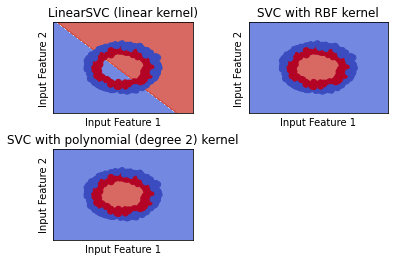

In [ ]:
# create a mesh to plot in
h=0.02;
x_min, x_max = sc2['Input Feature 1'].min() - 1, sc2['Input Feature 1'].max() + 1
y_min, y_max = sc2['Input Feature 2'].min() - 1, sc2['Input Feature 2'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 2) kernel']


for i, clf in enumerate((clfL, clfRBF, clfPoly)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(sc2['Input Feature 1'], sc2['Input Feature 2'], c=sc2['Output'], cmap=plt.cm.coolwarm)
    plt.xlabel('Input Feature 1')
    plt.ylabel('Input Feature 2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

##Problem 2, Part C: Multiclass Classification

Use Dataset C (``data_prob3_partc.csv``) for this part of the question. The given CSV file has three columns: column 1 is the first input feature, column 2 is the second input feature and column 3 is the output label. Split the dataset into training data (75%) and testing data (25%) randomly.


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data_prob2_partc.csv to data_prob2_partc.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df = pd.read_csv('data_prob2_partc.csv')
x=df[['Input Feature 1','Input Feature 2']]
y=df['Output']

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25,random_state=0)

Visualize the training data with a scatter plot (input feature 1 on the X axis, input feature 2 on the Y axis and color the points according to their labels).

Text(0, 0.5, 'Input Feature 2')

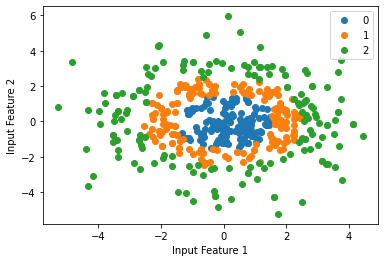

In [ ]:
sc2=pd.DataFrame(x_test['Input Feature 1'])
sc2['Input Feature 2']=x_test['Input Feature 2']
sc2['Output']=y_test
groups=sc2.groupby('Output')
for name, group in groups:
    plt.plot(group["Input Feature 1"], group["Input Feature 2"], marker="o", linestyle="", label=name)
plt.legend()


plt.xlabel('Input Feature 1')
plt.ylabel('Input Feature 2')

Build the Support Vector Machine  model using the 
training data. The scikit
library can be used to build the model.

In [ ]:
#Import svm model
from sklearn import svm

#Create a LINEAR svm Classifier
r=1;
clfL = svm.SVC(kernel='linear', C=r) # Linear Kernel
clfRBF = svm.SVC(kernel='rbf', gamma=1,C=r) # RBF Kernel
clfPoly= svm.SVC(kernel='poly', degree=2, C=r) # Poly Kernel


#Train the model using the training sets
clfL.fit(x_train, y_train)
clfRBF.fit(x_train, y_train)
clfPoly.fit(x_train, y_train)

#Predict the response for test dataset
y_predL = clfL.predict(x_test)
y_predRBF= clfRBF.predict(x_test)
y_predPoly = clfPoly.predict(x_test)

Print the final accuracy on the test data.

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy linear:",metrics.accuracy_score(y_test, y_predL))
print("Accuracy RBF:",metrics.accuracy_score(y_test, y_predRBF))
print("Accuracy Poly:",metrics.accuracy_score(y_test, y_predPoly))

Accuracy linear: 0.464
Accuracy RBF: 0.972
Accuracy Poly: 0.984


Plot the scatter plot for the test data. On top of this scatter plot, plot the decision boundary.

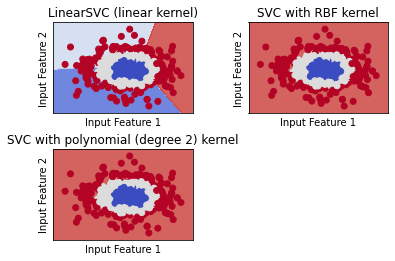

In [ ]:
# create a mesh to plot in
h=0.02;
x_min, x_max = sc2['Input Feature 1'].min() - 1, sc2['Input Feature 1'].max() + 1
y_min, y_max = sc2['Input Feature 2'].min() - 1, sc2['Input Feature 2'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 2) kernel']


for i, clf in enumerate((clfL, clfRBF, clfPoly)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(sc2['Input Feature 1'], sc2['Input Feature 2'], c=sc2['Output'], cmap=plt.cm.coolwarm)
    plt.xlabel('Input Feature 1')
    plt.ylabel('Input Feature 2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

# Problem 3 : Principal Component Analysis

#### In this exercise you will perform face recognition using eigenfaces. Face recognition can be formulated as a classification task, where the inputs are images and the outputs are people's names.

Load grayscale images from the LFW - Labeled faces in the Wild dataset using scikit-learn. To reduce the number of classes, retain pictures of only those people that have atleast 100 different pictures. (already done for you here) </br></br>
Report the number of images and the size of each image.

In [ ]:
from sklearn.datasets import fetch_lfw_people

lfw_people = fetch_lfw_people(min_faces_per_person=100)

In [ ]:
# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

Total dataset size:
n_samples: 1140
n_features: 2914
n_classes: 5


In [ ]:
target_names

array(['Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Tony Blair'], dtype='<U17')

Split the dataset into training and test sets in the ratio - 7:3.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Use scikit-learn's PCA class to perform dimensionality reduction on the training set images. Reduce the dimensions to 100 principal components. These principal components are the eigenfaces.

In [ ]:
from time import time
import logging
from sklearn.decomposition import PCA

# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction
n_components = 100

print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, X_train.shape[0]))
t0 = time()
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)
print("done in %0.3fs" % (time() - t0))

eigenfaces = pca.components_.reshape((n_components, h, w))

print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_train_pca = pca.transform(X_train)
projected = pca.inverse_transform(X_train_pca)
X_test_pca = pca.transform(X_test)
projected_T= pca.inverse_transform(X_test_pca)
print("done in %0.3fs" % (time() - t0))

Extracting the top 100 eigenfaces from 798 faces
done in 0.358s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.078s


Reshape the principal eigenvectors into images and visualize the eigenfaces. Display 10 eigenfaces. 

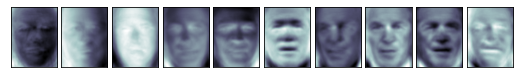

In [ ]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 10, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

Reconstruct any image (from training / test set) by projecting the image onto the new eigenface space. </br>
*   Display the reconstructed image along with the original image.
*   Report the reconstruction mean squared error. 

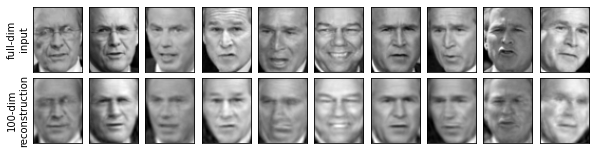

In [ ]:
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(X_train[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('100-dim\nreconstruction');

In [ ]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(X_train,projected)
mse

110.038605

Now that you have a reduced-dimensionality vector, train a single hidden layer neural network classifier with the person names as outputs and the reduced image vectors as input. You can use scikit-learn's MLPClassifier, with the number of neurons in the hidden layer set to 1024. 

In [ ]:
from sklearn.neural_network import MLPClassifier
# train a neural network
print("Fitting the classifier to the training set")
clf = MLPClassifier(hidden_layer_sizes=(1024,), batch_size=256, verbose=True, early_stopping=True).fit(X_train_pca, y_train)

Fitting the classifier to the training set
Iteration 1, loss = 1.60954187
Validation score: 0.487500
Iteration 2, loss = 1.14897904
Validation score: 0.550000
Iteration 3, loss = 0.91716538
Validation score: 0.575000
Iteration 4, loss = 0.74533711
Validation score: 0.612500
Iteration 5, loss = 0.58975438
Validation score: 0.737500
Iteration 6, loss = 0.46470104
Validation score: 0.787500
Iteration 7, loss = 0.38021653
Validation score: 0.800000
Iteration 8, loss = 0.31664066
Validation score: 0.837500
Iteration 9, loss = 0.26546754
Validation score: 0.837500
Iteration 10, loss = 0.22305136
Validation score: 0.837500
Iteration 11, loss = 0.18795573
Validation score: 0.837500
Iteration 12, loss = 0.15908156
Validation score: 0.837500
Iteration 13, loss = 0.13601584
Validation score: 0.837500
Iteration 14, loss = 0.11760409
Validation score: 0.837500
Iteration 15, loss = 0.10217825
Validation score: 0.837500
Iteration 16, loss = 0.08946096
Validation score: 0.837500
Iteration 17, loss = 0

Now test your network's predictions on the test set and print out the precision, recall and support values for each class. Also display the images (say, 10 test images) along with the true and the  predicted label.

In [ ]:
from sklearn.metrics import classification_report
y_pred = clf.predict(X_test_pca)
print(classification_report(y_test, y_pred, target_names=target_names))

                   precision    recall  f1-score   support

     Colin Powell       0.90      0.90      0.90        78
  Donald Rumsfeld       0.93      0.68      0.79        38
    George W Bush       0.88      0.94      0.91       159
Gerhard Schroeder       0.76      0.83      0.79        30
       Tony Blair       0.88      0.76      0.81        37

         accuracy                           0.87       342
        macro avg       0.87      0.82      0.84       342
     weighted avg       0.88      0.87      0.87       342



In [ ]:
import pandas as pd # data processing,
import numpy as np
df=pd.DataFrame()
test=["" for i in range(10)]
pred=["" for i in range(10)]

for i in range(0,10):
  test[i]=target_names[y_test[i]]
  pred[i]=target_names[y_pred[i]]

df["Test name"]=test
df["Corresponding pred name"]=pred
df


,Test name,Corresponding pred name
0,Colin Powell,Colin Powell
1,Colin Powell,Colin Powell
2,George W Bush,George W Bush
3,Gerhard Schroeder,Gerhard Schroeder
4,George W Bush,George W Bush
5,George W Bush,George W Bush
6,Colin Powell,Colin Powell
7,Tony Blair,Tony Blair
8,George W Bush,George W Bush
9,George W Bush,George W Bush


Text(0, 0.5, 'full-dim\ninput')

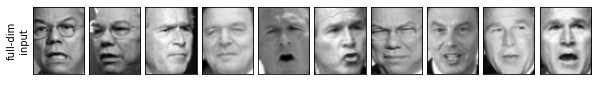

In [ ]:
# Plot the results
fig, ax = plt.subplots(1, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[i].imshow(X_test[i].reshape(62, 47), cmap='binary_r')     

ax[0].set_ylabel('full-dim\ninput')


Repeat all the above steps for different values of number of principal components or eigen faces - 100, 150 and 200. Explain the change in the proportion of the total variance explained by the eigenfaces and reconstruction mean squared error with increase in the number of eigenfaces.

In [ ]:
from time import time
import logging
from sklearn.decomposition import PCA
import math
from sklearn.metrics import mean_squared_error
# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction
n_components = [100, 120 , 200]
loss=[]
explained_variance=[]

for i in range(len(n_components)):
  print("Extracting the top %d eigenfaces from %d faces"
      % (n_components[i], X_train.shape[0]))

  pca = PCA(n_components=n_components[i], svd_solver='randomized',
          whiten=True).fit(X_train)

  eigenfaces = pca.components_.reshape((n_components[i], h, w))


  X_train_pca = pca.transform(X_train)
  projected = pca.inverse_transform(X_train_pca)
  X_test_pca = pca.transform(X_test)
  projected_T= pca.inverse_transform(X_test_pca)

  explained_variance.insert(i,sum(pca.explained_variance_ratio_))


  loss.insert(i,(mean_squared_error(X_train,projected)))
  print("The %d eigenfaces taken and corresponding MSE is %d with total variability %f" % (n_components[i],loss[i],explained_variance[i]))



Extracting the top 100 eigenfaces from 798 faces
The 100 eigenfaces taken and corresponding MSE is 110 with total variability 0.924525
Extracting the top 120 eigenfaces from 798 faces
The 120 eigenfaces taken and corresponding MSE is 89 with total variability 0.938685
Extracting the top 200 eigenfaces from 798 faces
The 200 eigenfaces taken and corresponding MSE is 43 with total variability 0.970216


In [ ]:
explained_variance

[0.9245251612155698, 0.9386854292824864, 0.9702156883722637]

Bonus : Try using eigenfaces to recognize images of animal faces.
